<a href="https://colab.research.google.com/github/piaseckazaneta/CV/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset

EDA + Classification methods (many methods and checking to compare)

Methodology
Importing Libraries
Loading Data
Performing Simple EDA
Feature Engineering & Selection
Splitting Data
Model Evaluation
Model Visulization
Conclusion

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.model_selection import RandomizedSearchCV # Exhaustive search over specified parameter values for an estimator

from sklearn.model_selection import train_test_split # Splits data into random subsets for train and test data
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report # Measure the quality of predictions from a classification algorithm
from sklearn.metrics import r2_score # Measuring the MSE and R-Squared values
from sklearn.metrics import mean_squared_error #The average of the square of the difference between the observed and predicted values of a variable
from sklearn import tree # non-parametric supervised learning method used for classification and regression
from sklearn.metrics import confusion_matrix #equal to the number of observations known to be in group and predicted to be in group
from sklearn.inspection import permutation_importance

In [3]:
!pip install numba llvmlite
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=83535424bac8a79abacef3409a07bfb2658ece8eef9d6da723a790df54033e46
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [5]:
from ydata_profiling import ProfileReport

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/iris-dataset")

print("Path to dataset files:", path)

100%|██████████| 999/999 [00:00<00:00, 1.47MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vikrishnan/iris-dataset/versions/1


In [ ]:
print(os.listdir(path))

['iris.data.csv']


In [9]:
file_path = "/root/.cache/kagglehub/datasets/vikrishnan/iris-dataset/versions/1/iris.data.csv"

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Wczytaj dane do DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Podgląd pierwszych 5 wierszy
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("iris_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# split dataset in features and target variable

X = df.drop('species', axis=1) #Features
y = df['species'] #Target variable

In [12]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(120, 4)
(120,)
(30, 4)
(30,)


In [13]:
# Lista modeli do porównania
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Trenujemy model
    y_pred = model.predict(X_test)  # Przewidujemy na testowym
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Warto też użyć F1-score przy klasyfikacji
    results[name] = {"Accuracy": accuracy, "F1-score": f1}

Podczas nauki miałam błąd przy f1. Błąd ten oznacza, że próbujesz obliczyć miarę jakości klasyfikacji (np. precision, recall, f1-score) przy założeniu, że masz problem binarny (average='binary'), ale w rzeczywistości masz problem wieloklasowy (multiclass).

Jak to naprawić?
Musisz zmienić parametr average na jedną z wartości obsługiwanych dla problemów wieloklasowych:

'micro' – liczy sumarycznie prawdziwe pozytywne, fałszywe pozytywne i fałszywe negatywne dla wszystkich klas, a następnie oblicza metryki.
'macro' – oblicza metryki dla każdej klasy osobno, a potem wyciąga średnią.
'weighted' – jak 'macro', ale dodatkowo uwzględnia liczbę próbek w każdej klasie (czyli średnia ważona).

In [14]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  F1-score
Logistic Regression       1.0       1.0
Random Forest             1.0       1.0
SVM                       1.0       1.0
KNN                       1.0       1.0


In [17]:
best_model = models["Random Forest"]  # RF jako przykład do wygenerowania macierzy pomyłek. Każdy model ma 100%
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


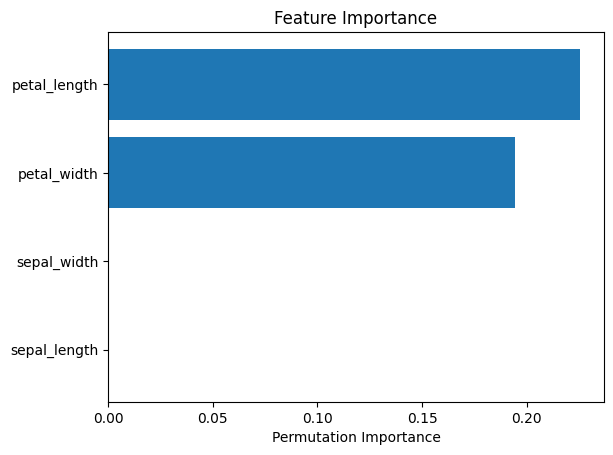

In [18]:
# Permutation importance
perm_importance = permutation_importance(models["Random Forest"], X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()